In [1]:
import pandas as pd 
import numpy as np 
from numpy import math
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data = pd.read_csv('startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Text(0.5, 1.0, 'Profit vs Marketing Spend')

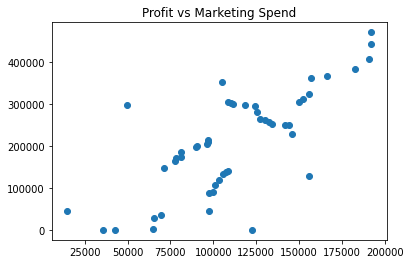

In [7]:
plt.scatter(data.Profit,data['Marketing Spend'])
plt.title('Profit vs Marketing Spend')

Text(0.5, 1.0, 'Profit vs R&D Spend')

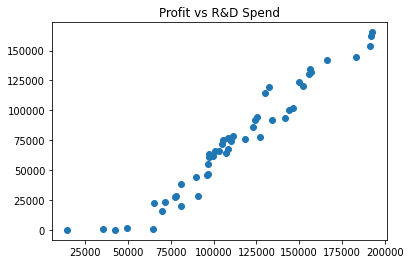

In [8]:
plt.scatter(data.Profit,data['R&D Spend'])
plt.title('Profit vs R&D Spend')

Text(0.5, 1.0, 'Profit vs Administration')

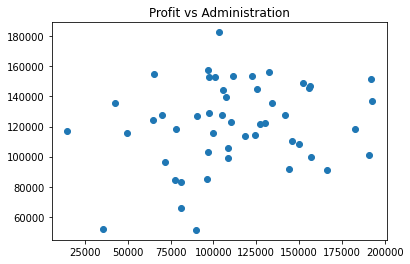

In [9]:
plt.scatter(data.Profit,data['Administration'])
plt.title('Profit vs Administration')

<AxesSubplot:xlabel='State'>

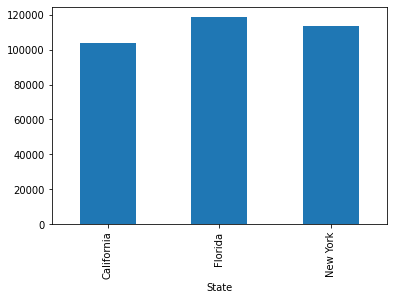

In [10]:
data.groupby(['State'])['Profit'].mean().plot(kind='bar')

In [11]:
data['California'] = np.where(data['State']=='California',1,0)
data['New York'] = np.where(data['State']=='New York',1,0)
data['Florida'] = np.where(data['State']=='Florida',1,0)

In [12]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,New York,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,0,1,0
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,0,1,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [13]:
data.drop(columns=['State'],axis= 1,inplace=True)

In [14]:
dv = ['Profit']
iv = set(data.columns)-set(dv)

In [15]:
iv

{'Administration',
 'California',
 'Florida',
 'Marketing Spend',
 'New York',
 'R&D Spend'}

In [16]:
y=data[dv].values

In [17]:
x=data[iv].values
x

array([[1.3689780e+05, 0.0000000e+00, 1.6534920e+05, 1.0000000e+00,
        0.0000000e+00, 4.7178410e+05],
       [1.5137759e+05, 1.0000000e+00, 1.6259770e+05, 0.0000000e+00,
        0.0000000e+00, 4.4389853e+05],
       [1.0114555e+05, 0.0000000e+00, 1.5344151e+05, 0.0000000e+00,
        1.0000000e+00, 4.0793454e+05],
       [1.1867185e+05, 0.0000000e+00, 1.4437241e+05, 1.0000000e+00,
        0.0000000e+00, 3.8319962e+05],
       [9.1391770e+04, 0.0000000e+00, 1.4210734e+05, 0.0000000e+00,
        1.0000000e+00, 3.6616842e+05],
       [9.9814710e+04, 0.0000000e+00, 1.3187690e+05, 1.0000000e+00,
        0.0000000e+00, 3.6286136e+05],
       [1.4719887e+05, 1.0000000e+00, 1.3461546e+05, 0.0000000e+00,
        0.0000000e+00, 1.2771682e+05],
       [1.4553006e+05, 0.0000000e+00, 1.3029813e+05, 0.0000000e+00,
        1.0000000e+00, 3.2387668e+05],
       [1.4871895e+05, 0.0000000e+00, 1.2054252e+05, 1.0000000e+00,
        0.0000000e+00, 3.1161329e+05],
       [1.0867917e+05, 1.0000000e+00,

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=0) 

In [19]:
#Tranforming Data
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [20]:
x_train[:10]

array([[0.48655174, 0.        , 0.33561668, 0.        , 1.        ,
        0.45494286],
       [0.3173015 , 0.        , 0.2782839 , 1.        , 0.        ,
        0.43561799],
       [0.87258866, 0.        , 0.45557444, 0.        , 1.        ,
        0.28413435],
       [1.        , 1.        , 0.2807759 , 0.        , 0.        ,
        0.44680961],
       [0.59103645, 0.        , 0.55488118, 0.        , 1.        ,
        0.62511553],
       [0.88568959, 0.        , 0.7880179 , 0.        , 1.        ,
        0.68649342],
       [0.98922572, 0.        , 0.72539353, 0.        , 1.        ,
        0.54370828],
       [0.6847981 , 0.        , 0.0060492 , 1.        , 0.        ,
        0.0040356 ],
       [0.00432296, 0.        , 0.00327821, 1.        , 0.        ,
        0.        ],
       [0.95618996, 0.        , 0.39676926, 1.        , 0.        ,
        0.22709197]])

In [21]:
regressor = LinearRegression()

In [22]:
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
regressor.coef_

array([[ 3.49927567e+03,  8.66383692e+01,  1.27892182e+05,
         7.86007422e+02, -8.72645791e+02,  1.72720281e+04]])

In [24]:
regressor.intercept_

array([44153.95466785])

In [25]:
y_pred_train = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

In [32]:
y_pred

array([[ 92389.54934362],
       [130971.5926314 ],
       [130655.7162717 ],
       [ 55320.61403173],
       [189500.94848885],
       [110917.10665358],
       [ 50182.72329233],
       [ 86814.55454313],
       [108223.84518171],
       [176070.59627474]])

In [33]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

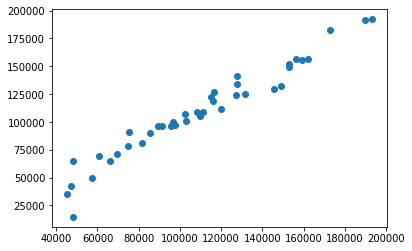

In [26]:
plt.scatter(y_pred_train,y_train)

In [34]:
metrics.r2_score(y_train,y_pred_train)

0.9501847627493607

In [35]:
metrics.r2_score(y_test,y_pred)

0.823526206209644

In [29]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

In [30]:
math.sqrt(metrics.mean_squared_error(y_train,y_pred_train))

9031.666612578969

In [31]:
math.sqrt(metrics.mean_squared_error(y_test,y_pred))

15023.010725678312